In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import matplotlib.pyplot as plt
os.chdir("/Users/burke/Documents/research/bpCog/microsim")
from microsim.population import NHANESDirectSamplePopulation
from microsim.dementia_model import DementiaModel
from microsim.outcome import OutcomeType
from microsim.outcome_model_type import OutcomeModelType

import pandas as pd
import numpy as np

import multiprocessing as mp
mp.set_start_method('forkserver')

/Users/burke/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def runParameters(linear, quadratic, popSize=40000):
    # get dataframe on dementia indidcne
    # calculate incidence by age 
    demModel = DementiaModel(linear, quadratic)
    pop = NHANESDirectSamplePopulation(n=popSize, year=1999)
    pop._outcome_model_repository._models[OutcomeModelType.DEMENTIA] = demModel
    pop.advance_multi_process(20)
    
    incidence = pop.get_raw_incidence_by_age(OutcomeType.DEMENTIA)
    predIncidence = .084*np.exp(0.142 * (incidence.index-60))
    
    incidenceUnder90 = incidence[:90]
    # compare to brookmeu
    predIncidence = .084*np.exp(0.142 * (incidenceUnder90.index-60))/100
    
    mse = ((incidenceUnder90-predIncidence)**2).sum()

    return (incidenceUnder90, mse, linear, quadratic)

In [4]:
mses = [result[1] for result in results]

In [19]:
linearBase = 5.64485841e-05
quadraticBase=9.33371239e-05

linearMultipliers = [0.01, 0.05, 0.1, 0.25, 0.375, 0.5, 1.0]
quadraticMultipliers = [0.01, 0.05, 0.1, 0.25]

results = []
count = 0

for lin in linearMultipliers:
    for quad in quadraticMultipliers:
        print(f"COUNT: {count}")
        results.append(runParameters(linearBase*lin, quad*quadraticBase, 40000))
        count += 1


COUNT: 0
processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
processing year: 10
processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15
processing year: 16
processing year: 17
processing year: 18
processing year: 19
COUNT: 1
processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
processing year: 10
processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15
processing year: 16
processing year: 17
processing year: 18
processing year: 19
COUNT: 2
processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
pro

processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15
processing year: 16
processing year: 17
processing year: 18
processing year: 19
COUNT: 21
processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
processing year: 10
processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15
processing year: 16
processing year: 17
processing year: 18
processing year: 19
COUNT: 22
processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
processing year: 10
processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15
processing year: 16
processing year: 17
processing year: 18
processing year: 19
COUNT: 23
processing

In [20]:
resultsDF = pd.DataFrame({'mse' : [result[1] for result in results], 
                         'linear' : [result[2] for result in results],
                         'quadratic' : [result[3] for result in results]})
resultsDF.sort_values('mse', inplace=True)

In [21]:
resultsDF

,mse,linear,quadratic
20,0.000448,2.822429e-05,9.333712e-07
16,0.001086,2.116822e-05,9.333712e-07
12,0.001658,1.411215e-05,9.333712e-07
24,0.001769,5.644858e-05,9.333712e-07
5,0.002389,2.822429e-06,4.666856e-06
1,0.002523,5.644858e-07,4.666856e-06
9,0.002572,5.644858e-06,4.666856e-06
8,0.003781,5.644858e-06,9.333712e-07
4,0.003989,2.822429e-06,9.333712e-07
13,0.004121,1.411215e-05,4.666856e-06


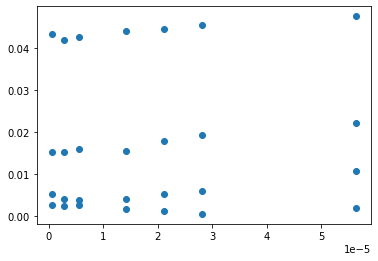

In [24]:
plt.scatter(resultsDF.linear, resultsDF.mse)

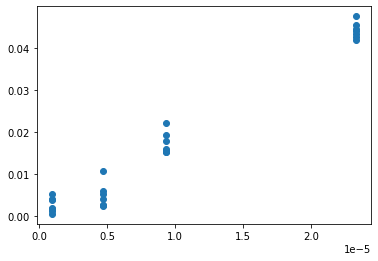

In [25]:
plt.scatter(resultsDF.quadratic, resultsDF.mse)

In [29]:
### the best matching row
resultsDF.iloc[20]

mse          0.022018
linear       0.000056
quadratic    0.000009
Name: 26, dtype: float64

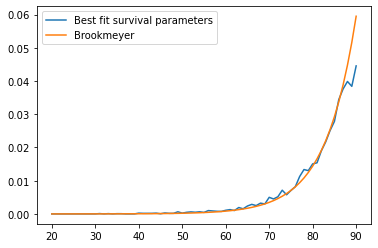

In [27]:
plt.plot(results[20][0].index, results[20][0].values, label='Best fit survival parameters')
predIncidence = .084*np.exp(0.142 * (results[20][0].index-60))/100


plt.plot(results[0][0].index, predIncidence, label='Brookmeyer')
plt.legend()

In [12]:
pd.Series(mses).idxmax()

23

In [7]:
pd.Series(mses).describe()

count    36.000000
mean      0.066566
std       0.030118
min       0.015788
25%       0.045035
50%       0.065694
75%       0.091142
max       0.113559
dtype: float64

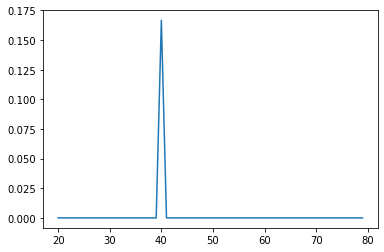

In [11]:
plt.plot(results[24][0].index, results[24][0].values)

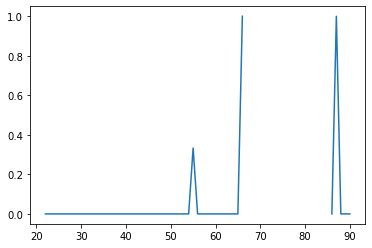

In [13]:
plt.plot(results[23][0].index, results[23][0].values)

### OK...here is the state of affairs...

it looks like i can get a simple strategy to fit the MSES...but, it probably requires a large population to be able to get the fit — random low event rates are otherwise going to look best.

let's try and fit a computationally intensive approach over the weekend and see if we find a good fit.

if so...great...

if not...then, the idea would be to run a SINGLE large population to get the linear predictors and then swap out the hazard functions...and do a more reliable change of the hazard function only to see how it fits. analytically, that woudl clearly be better...but, its a lot more coding work and a potential source of bugs. 

In [12]:
test[0]

age
20.0    0.000000
21.0    0.000000
22.0    0.000000
23.0    0.000000
24.0    0.000000
          ...   
86.0    0.035088
87.0    0.106383
88.0    0.025000
89.0    0.027778
90.0    0.033333
Length: 71, dtype: float64

In [11]:
test = runParameters(5.64485841e-05, 9.33371239e-05, 500)

processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
processing year: 10
processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15
processing year: 16
processing year: 17
processing year: 18
processing year: 19


In [22]:
predIncidence = .084*np.exp(0.142 * (test[0].index-60))/100
explore = pd.DataFrame(test[0])
explore['predIncidence'] = predIncidence
explore['diff'] = explore[0] - predIncidence
explore['diffSquare'] = (explore[0] - predIncidence)**2


In [24]:
explore

,0,predIncidence,diff,diffSquare
age,,,,
20.0,0.000000,0.000003,-0.000003,8.221920e-12
21.0,0.000000,0.000003,-0.000003,1.092227e-11
22.0,0.000000,0.000004,-0.000004,1.450950e-11
23.0,0.000000,0.000004,-0.000004,1.927490e-11
24.0,0.000000,0.000005,-0.000005,2.560541e-11
...,...,...,...,...
86.0,0.035088,0.033705,0.001383,1.911874e-06
87.0,0.106383,0.038848,0.067535,4.561026e-03
88.0,0.025000,0.044775,-0.019775,3.910447e-04


In [4]:
demModel = DementiaModel()
pop = NHANESDirectSamplePopulation(n=1000, year=1999)
pop._outcome_model_repository._models[OutcomeModelType.DEMENTIA] = demModel
pop.advance_multi_process(20)

incidence = pop.get_raw_incidence_by_age(OutcomeType.DEMENTIA)

processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
processing year: 10
processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15
processing year: 16
processing year: 17
processing year: 18
processing year: 19


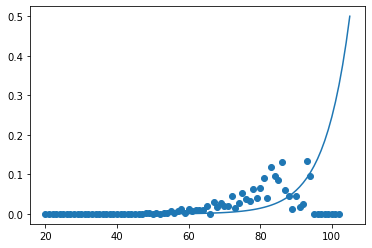

In [7]:
plt.scatter(incidence.index, incidence.values)
predIncidence = .084*np.exp(0.142 * (incidence.index-60))
plt.plot(incidence.index, predIncidence/100, label="brookmeyer")

In [11]:
incidence1 = runParameters(linear=5.64485841e-05, quadratic=1.33371239e-05)

processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
processing year: 10
processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15
processing year: 16
processing year: 17
processing year: 18
processing year: 19


In [12]:
incidence2 = runParameters(linear=5.64485841e-05, quadratic=4.83371239e-05)

processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
processing year: 10
processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15
processing year: 16
processing year: 17
processing year: 18
processing year: 19


In [13]:
incidence3 = runParameters(linear=5.64485841e-05, quadratic=9.33371239e-05)

processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
processing year: 10
processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15
processing year: 16
processing year: 17
processing year: 18
processing year: 19


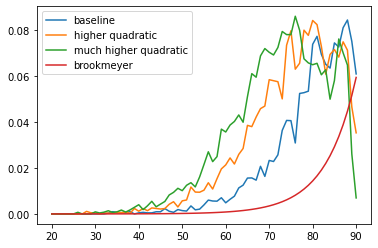

In [15]:
incidence1 = incidence1[:90]
incidence2 = incidence2[:90]
incidence3 = incidence3[:90]


plt.plot(incidence1.index, incidence1.values, label="baseline")
plt.plot(incidence2.index, incidence2.values, label="higher quadratic")
plt.plot(incidence3.index, incidence3.values, label="much higher quadratic")

predIncidence = .084*np.exp(0.142 * (incidence1.index-60))
plt.plot(incidence1.index, predIncidence/100, label="brookmeyer")
plt.legend()


In [52]:
mses.sort()

In [53]:
mses

[137.20627825504437,
 137.5623107348465,
 137.597698649203,
 137.65967929497123,
 137.89170343159768,
 137.91562362081922,
 137.9663803874884,
 138.0296371443565,
 138.06954381974123,
 138.0860490870654,
 138.2501966336064,
 138.28208248613345,
 138.32364080110654,
 138.3309783773932,
 138.332657424833,
 138.34092349489322,
 138.43773337394794,
 138.56691916534848,
 138.6234197220618,
 138.6258759887648,
 138.64331859274336,
 138.6537532044951,
 138.69000712840534,
 138.9315448619389,
 138.98707960200866]

In [30]:
mses = [result[1] for result in results]
pd.Series(mses).describe()

count     25.000000
mean     138.240201
std        0.443758
min      137.206278
25%      137.966380
50%      138.323641
75%      138.623420
max      138.987080
dtype: float64

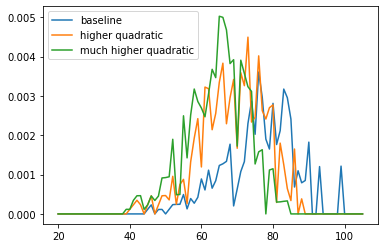

In [7]:
plt.plot(test1.index, test1.values, label="baseline")
plt.plot(test2.index, test2.values, label="higher quadratic")
plt.plot(test3.index, test3.values, label="much higher quadratic")

plt.legend()

In [18]:
((incidence1-predIncidence)**2).sum()

137.36207804428355

In [19]:
((incidence2-predIncidence)**2).sum()

137.66293034922236

In [20]:
((incidence3-predIncidence)**2).sum()

138.45013764204063

In [ ]:
# first, just try some slight variations on our baseline model...
# then, see if we can run this through scipy optimize...


https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html